# Desarrollo de la práctica

## Importación de librerías

In [82]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm, t, tstd
from math import sqrt

## Definición de variables para $\beta_1$ y $\beta_2$

In [83]:
n = 25
b1 = 20
b2 = 0.6

## Función para calcular valores de $Y_i$ 

In [84]:
def Yi():
    global b1, b2, n, Xi
    Y = []
    # Generar 25 valores aleatorios para la distribución normal N(0, 16)
    mu, sigma = 0, 4 # mu=0 y sigma=4 por que la varianza es 16
    ui = tuple(np.random.normal(mu, sigma, n))
    for i in range(n):
        yi = b1 + b2 * Xi[i] + ui[i]
        Y.append(yi)
    return(Y)

## Generar valores de $X$ aleatorios

In [85]:
Xi = []
for i in range(n):
    Xi.append(random.uniform(50, 300))
print("VALORES DE X \n")
for x in Xi:
    print(x)

VALORES DE X 

116.04457846850758
98.18320918224498
165.65787455371517
150.08513967536442
279.574183360941
235.5985345681106
268.3652143155024
161.0167999765122
159.86816125367994
180.14163118063246
179.4587676560812
87.84528247526507
282.9055574620014
137.28962405062518
133.96672411181214
74.14948894513361
247.86831827417436
233.21861600466124
106.48493438544405
75.5316476993288
277.30022962643085
172.277326039701
291.6777128175273
60.11865731240202
279.0175627167914


## Regresión lineal para las $Y_i$'s obtenidas y los $X$ generados

In [86]:
from scipy.stats import linregress
B1 = []
B2 = []
S = []
X = np.array(Xi)
for i in range(500):
    y = np.array(Yi())
    ybar = y.mean()

    slope, intercept, r_value, p_value, std_err = linregress(X, y)

    SSR = (r_value ** 2) * np.sum((y - (slope * X + intercept)) ** 2)   #calcular de cuadrados de la regresion
    SST = 0
    for i in range(len(y)):
        SST += (y[i]-ybar)**2           #calcular suma total de cuadrados
    sigma_est = (SST-SSR) / (n - 2)

    S.append(sigma_est)
    B1.append(intercept)
    B2.append(slope)

## Creación de histogramas de frecuencias

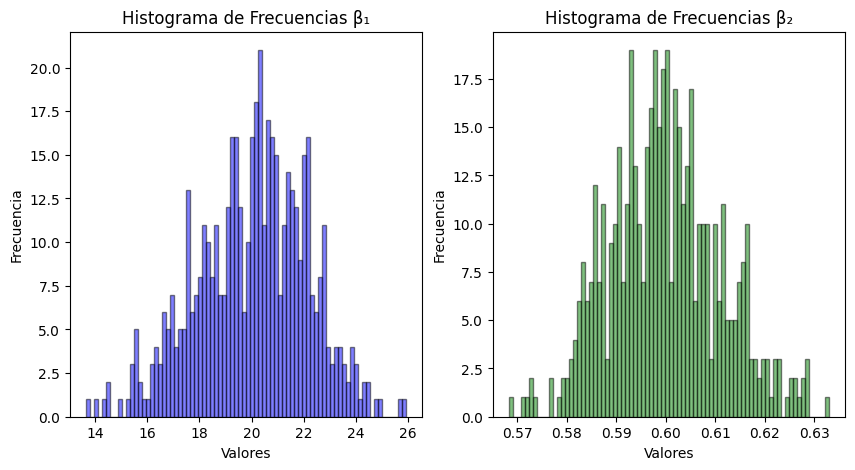

In [87]:
# Crear dos subplots y hacer un histograma de frecuencias para cada conjunto de datos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(B1, bins=80, color='blue', alpha=0.5, edgecolor='black')
axs[1].hist(B2, bins=80, color='green', alpha=0.5, edgecolor='black')
# Establecer el título y las etiquetas de los ejes
axs[0].set_title('Histograma de Frecuencias β₁')
axs[1].set_title('Histograma de Frecuencias β₂')
axs[0].set_xlabel('Valores')
axs[1].set_xlabel('Valores')
axs[0].set_ylabel('Frecuencia')
axs[1].set_ylabel('Frecuencia')
# Mostrar la figura
plt.show()


## Describir si hay algún nivel de asimetría

En la representación gráfica de los datos mediante el histograma, es común observar que los datos se agrupan alrededor de la media, lo que sugiere que la mayoría de los datos tienen valores cercanos a la media. Además, se puede notar que la frecuencia de los valores máximos y mínimos es baja, lo que indica que estos valores son menos comunes en comparación con los valores cercanos a la media.

Cabe destacar que, al repetir el procedimiento de generación de histogramas de frecuencias para los coeficientes $\beta_1$ y $\beta_2$ en distintas ocasiones, se puede observar que el coeficiente de asimetría de Pearson no siempre mantiene su signo. Esto significa que el histograma de frecuencias no siempre está sesgado hacia el mismo lado, lo que puede afectar la interpretación de los datos. Por lo tanto, es importante ser cuidadosos en el análisis de los resultados y considerar la posibilidad de que el sesgo del histograma pueda cambiar en diferentes muestras de datos.

## Obtener los *números índice*

In [88]:
# Obtener la media
mediaB1 = np.mean(B1)
mediaB2 = np.mean(B2)

# Obtener el minimo
minB1 = min(B1)
minB2 = min(B2)

# Obtener maximo
maxB1 = max(B1)
maxB2 = max(B2)

# Obtener mediana
medianaB1 = np.median(B1)
medianaB2 = np.median(B2)

# Obtener 1 y 3 cuartil
q1B1 = np.percentile(B1,25)
q1B2 = np.percentile(B2,25)
q3B1 = np.percentile(B1,75)
q3B2 = np.percentile(B2,75)

In [89]:
print("Medias: {},{}".format(mediaB1,mediaB2))
print("Mínimos: {}, {}".format(minB1,minB2))
print("Máximos: {}, {}".format(maxB1,maxB2))
print("Medias: {}, {}".format(medianaB1,medianaB2))
print("Primer cuartil: {}, {}".format(q1B1,q1B2))
print("Tercer cuartil: {}, {}".format(q3B1,q3B2))

Medias: 20.032949420200502,0.5998149080750095
Mínimos: 13.658433375927515, 0.5683119645390748
Máximos: 25.92263606885608, 0.6330007429269229
Medias: 20.209986940691017, 0.5993769130672173
Primer cuartil: 18.60596740396714, 0.5920345835738051
Tercer cuartil: 21.562552518178407, 0.6069930099189788


### ¿Se cumple $E(\hat{\beta}_i) = \beta_i$?

In [90]:
mediaB1

20.032949420200502

In [91]:
mediaB2

0.5998149080750095

No se cumple la igualdad de forma exacta, pero los valores son muy cercanos. Esto nos lleva a pensar que $\hat{\beta}_1$ y $\hat{\beta}_2$ son buenos estimadores de $\beta_1$ y $\beta_2$. Están muy cercanos a ser estimadores insesgados, de acuerdo al resultado arrojado con la muestra tomada. De hecho, si aproximamos a dos cifras significativas a $E(\hat{\beta_i})$, tenemos $E(\hat{\beta_i})=\beta_i$.

## Construcción de intervalos de confianza

Dado que tenemos más de 30 valores de $\hat{\beta_2}$ y podemos conocer la varianza muestral, construiremos el intervalo de confianza usando la distribución t-Student con 498 grados de libertad y un nivel de significancia de 0.05. Dado que la muestra es grande, se puede utilizar la distribución normal. 

In [92]:
#Construcción del intervalo de confianza
intervalo = t.interval(0.9, len(B2) - 2, loc = mediaB2, scale = tstd(B2))
intervalo


(0.581253822572744, 0.6183759935772749)

## Determinar la proporción de intervalos que contienen el parámetro $\beta_2$

In [93]:
contador = 0
for valor in B2:
    if intervalo[0] < valor < intervalo[1]:
        contador += 1
proporcion = contador / len(B2)
proporcion

0.912

La proporcion de los datos que estan dentro del intervalo de confianza esta bastante cerca al nivel de confianza. Esto indica que el intervalo de confianza es apropiado para los datos y que la estimación del coeficiente de la regresión es precisa.

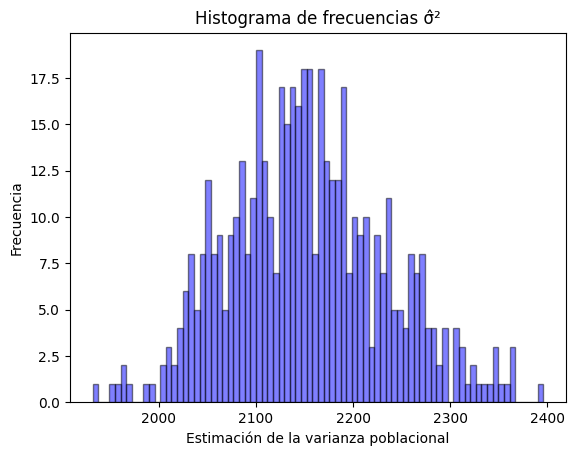

In [94]:
# Crear dos subplots y hacer un histograma de frecuencias para cada conjunto de datos

plt.hist(S, bins=80, color='blue', alpha=0.5, edgecolor='black')

plt.xlabel("Estimación de la varianza poblacional")
plt.ylabel("Frecuencia")
plt.title("Histograma de frecuencias \u03C3\u0302²")
# Mostrar la figura
plt.show()


Podemos notar que el histograma de frecuencias parece modelar una distribución de probabilidad $\chi^2$. Esto tiene mucho sentido si recordamos el hecho que las perturbaciones de la regresión lineal vienen de una distribución normal (entonces la suma de sus cuadrados tendrá distribución $\chi^2$), por lo que la distribución muestral de la varianza poblacional se puede aproximar  por la distribución $\chi^2$ con $500-2=498$ grados de libertad. 

# Preguntas adicionales

## ¿Por qué se eligió Python como lenguaje de programación?

Sabemos que, a la hora de elegir un lenguaje de programación para realizar algunos análisis estadísticos, surge la pregunta de si elegir Python o R. En el desarrollo del examen, decidimos utilizar Python pues, aunque ambas herramientas son poderosas y útiles, Python es un lenguaje de programación más versátil en términos de su uso en diferentes entornos y plataformas, mientras que R está más orientado a trabajar en un entorno de análisis estadístico en particular. Además, dado que Python es un lenguaje de programación más popular en general, es más fácil encontrar recursos en línea para aprender a programar cosas nuevas. Además, Python tiene un ecosistema de paquetes más amplio que R. Todas las razones anteriores sin mencionar que Python ha sido el lenguaje de programación con el que hemos venido trabajando, por lo que se tiene más práctica y conocimiento que en cuanto a R. 

## Librerías específicas para realizar la tarea

Se utilizaron: 

- Numpy: para usar arreglos más eficientes y calcular algunos estadísticos

- random : para generar número pseudoaleatorios

- sklearn.linear_model: para realizar la regresión lineal

- matplotlib.pyplot: para realizar los histogramas

- statistics: para hacer el cálculo de algunos estadísticos

## Incluir semilla usada

La semilla utilizada fue:

In [95]:
print(random.getstate()[1][0])

2564654929


## Procedimiento para obtención de los valores X

Se utilizó la librería random de Python para generar 25 números pseudoaleatorios con la semilla especificada anteriormente. La librería random utiliza el algoritmo de Mersenne Twister para generar los números que parecen ser aleatorios pero que, en realidad son determinísticos pues se basan en una semilla o número inicial para generar una secuencia. A grandes rasgos, el algoritmo de Mersenne Twister utiliza un registro de estado interno de 624 valores de 32 bits, que es un arreglo que contiene 624 números de 32 bits. Cada uno de los 624 valores del registro de estado interno es un número entero de 32 bits, lo que significa que puede representar un valor entero en el rango de -2147483648 a 2147483647. El tamaño total del registro de estado interno es de 624 * 32 bits = 19968 bits.